## Importing the Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Accessing the Dataset and About Dataset

In [4]:
# Load datasets
incidents_data_path = "Crash_Reporting_-_Incidents_Data.csv"
non_motorists_data_path = "CrashReportingNonMotoristsData.csv"

incidents_data = pd.read_csv(incidents_data_path, low_memory=False)
non_motorists_data = pd.read_csv(non_motorists_data_path)

# Append rows (Union of both datasets)
combined_data = pd.concat([incidents_data, non_motorists_data], ignore_index=True)

# Save the combined dataset to a new file
combined_data.to_csv("Combined_Crash_Reports.csv", index=False)

df = pd.read_csv("Combined_Crash_Reports.csv")



C:\Users\bhars\AppData\Local\Temp\ipykernel_5260\3232915295.py:14: DtypeWarning: Columns (3,5,6,7,9,10,18,19,20,21,22,23,24,27,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Combined_Crash_Reports.csv")


In [5]:
# Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115355 entries, 0 to 115354
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Agency Name                   115355 non-null  object 
 1   ACRS Report Type              115355 non-null  object 
 2   Crash Date/Time               115355 non-null  object 
 3   Hit/Run                       106858 non-null  object 
 4   Route Type                    99514 non-null   object 
 5   Lane Direction                95196 non-null   object 
 6   Number of Lanes               96600 non-null   object 
 7   Direction                     95213 non-null   object 
 8   Distance                      97076 non-null   float64
 9   Distance Unit                 96612 non-null   object 
 10  Road Grade                    94585 non-null   object 
 11  At Fault                      115068 non-null  object 
 12  Collision Type                114673 non-nul

In [6]:
# Display first few rows
df.head()

,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Number of Lanes,Direction,Distance,Distance Unit,...,Related Non-Motorist,Non-Motorist Substance Abuse,Person ID,Pedestrian Type,Pedestrian Movement,Pedestrian Actions,Pedestrian Location,Injury Severity,Safety Equipment,Location
0,Montgomery County Police,Injury Crash,3/4/2019 8:41,No,Maryland (State),West,2,East,200.0,FEET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Montgomery County Police,Property Damage Crash,6/4/2016 19:14,Yes,County,East,1,East,500.0,FEET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MONTGOMERY,Property Damage Crash,8/18/2015 23:00,No,County,South,2,South,30.0,FEET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Montgomery County Police,Injury Crash,8/24/2023 7:46,No,Maryland (State),West,4,West,50.0,FEET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rockville Police Departme,Property Damage Crash,8/12/2023 16:28,Yes,NaN,South,3,South,40.0,FEET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Summary statistics for numerical features
df.describe()

,Distance,Latitude,Longitude,Local Case Number
count,97076.000000,115355.000000,115355.000000,6.416000e+03
mean,57.719149,39.083728,-77.114109,1.603164e+08
std,136.698376,0.072597,0.098961,9.627276e+07
min,0.000000,37.720000,-79.486000,1.705200e+04
25%,0.000000,39.025224,-77.191546,1.705008e+08
50%,0.200000,39.075643,-77.107035,1.900482e+08
75%,50.000000,39.140593,-77.040613,2.200420e+08
max,10078.320000,39.990414,-75.527708,2.400213e+09


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Hit/Run                           8497
Route Type                       15841
Lane Direction                   20159
Number of Lanes                  18755
Direction                        20142
Distance                         18279
Distance Unit                    18743
Road Grade                       20770
At Fault                           287
Collision Type                     682
Weather                           8406
Surface Condition                17630
Light                              861
Traffic Control                  18742
Driver Substance Abuse           16779
First Harmful Event               7066
Second Harmful Event             86955
Junction                         34235
Intersection Type                63726
Road Alignment                   20552
Road Condition                   25456
Road Division                    21332
Report Number                   108939
Local Case Number               108939
Road Name                       110407
Cross-St

## Exploratory of Data Analysis

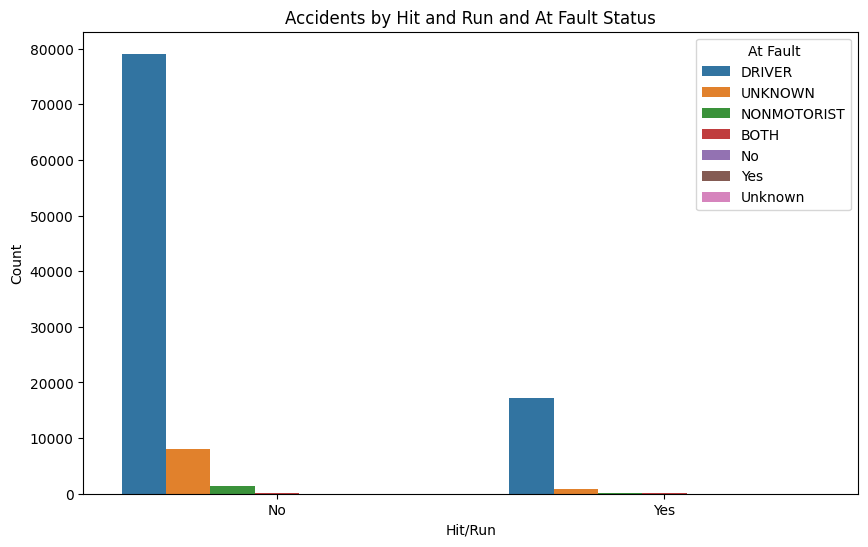

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hit/Run', hue='At Fault')
plt.title('Accidents by Hit and Run and At Fault Status')
plt.xlabel('Hit/Run')
plt.ylabel('Count')
plt.show()

The chart shows that the majority of accidents are not hit-and-run cases, with drivers being predominantly at fault. In hit-and-run cases, drivers are still the most common at-fault party, but the overall numbers are much lower.

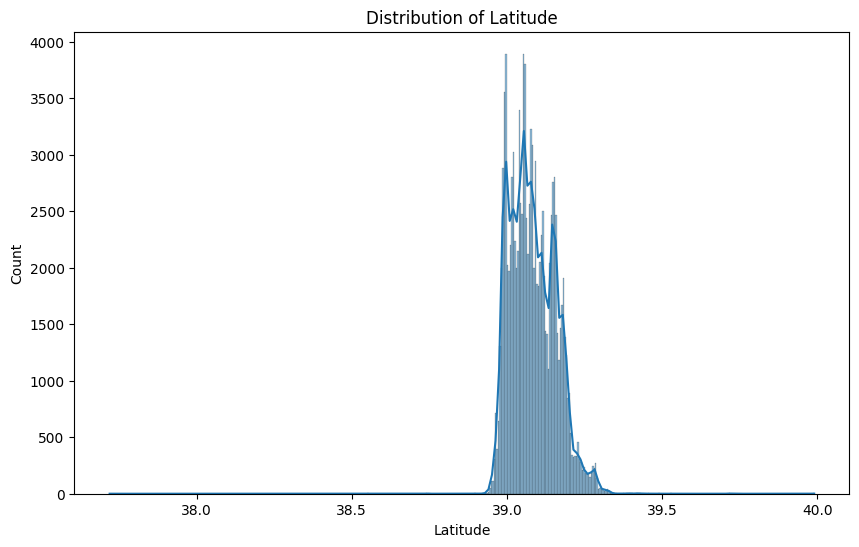

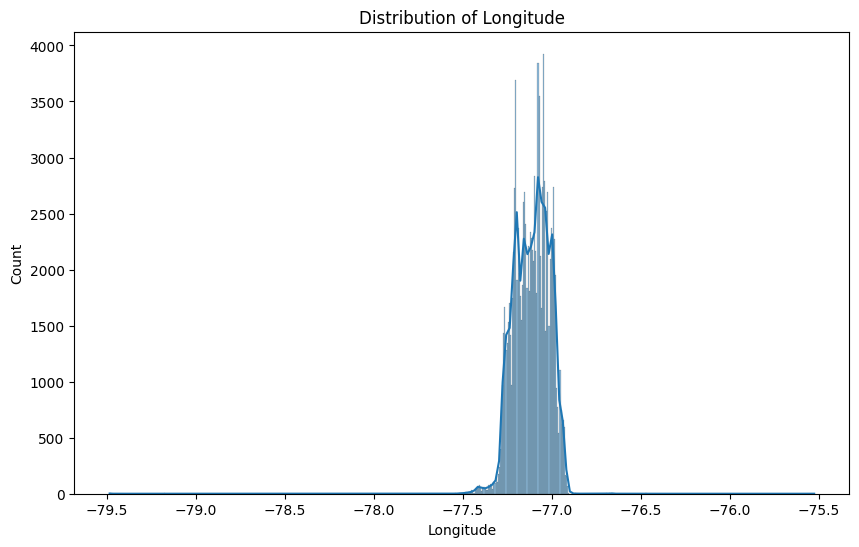

In [12]:
numeric_columns = ['Latitude', 'Longitude']

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

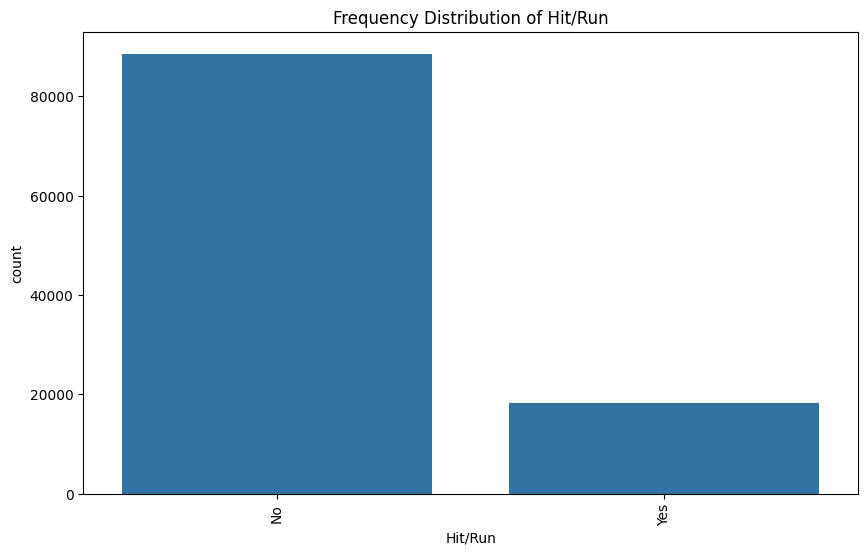

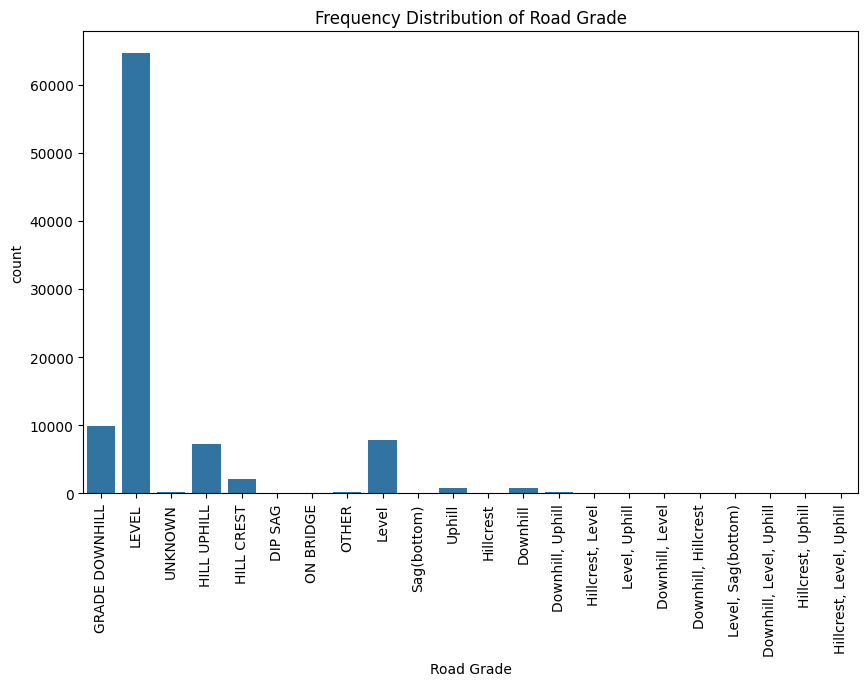

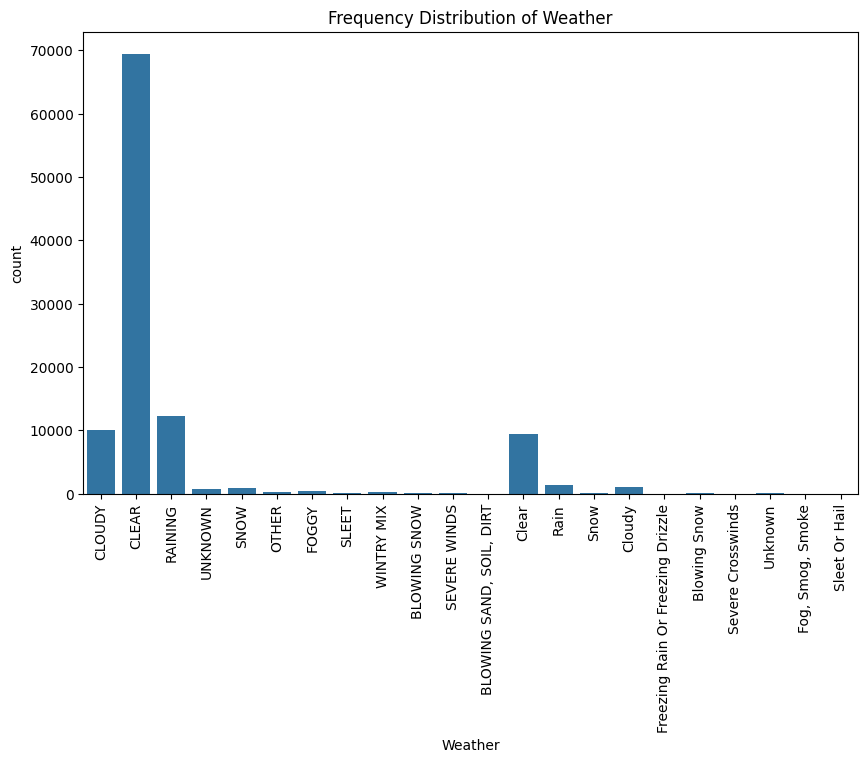

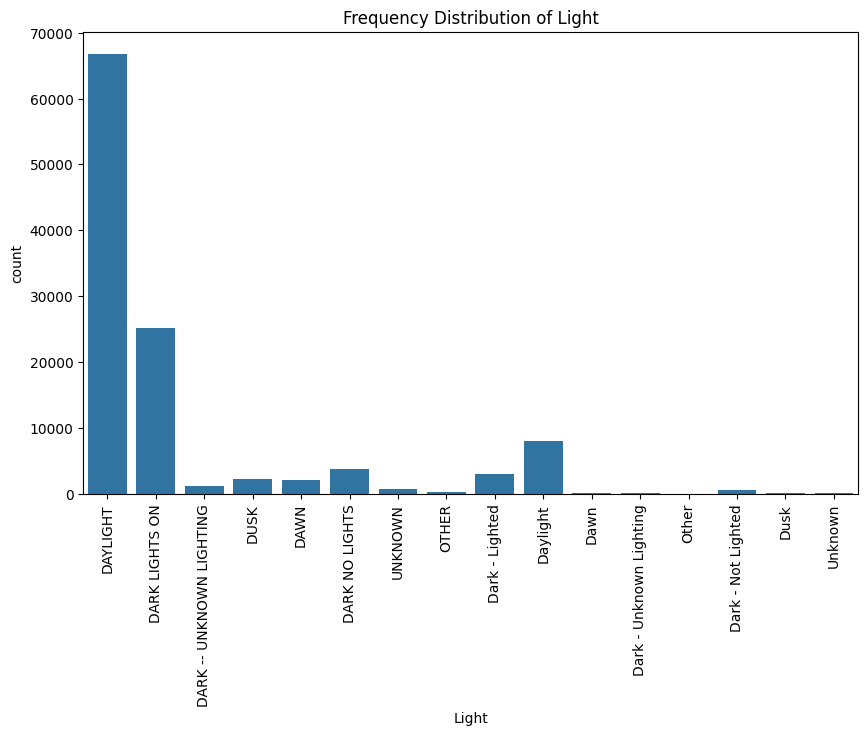

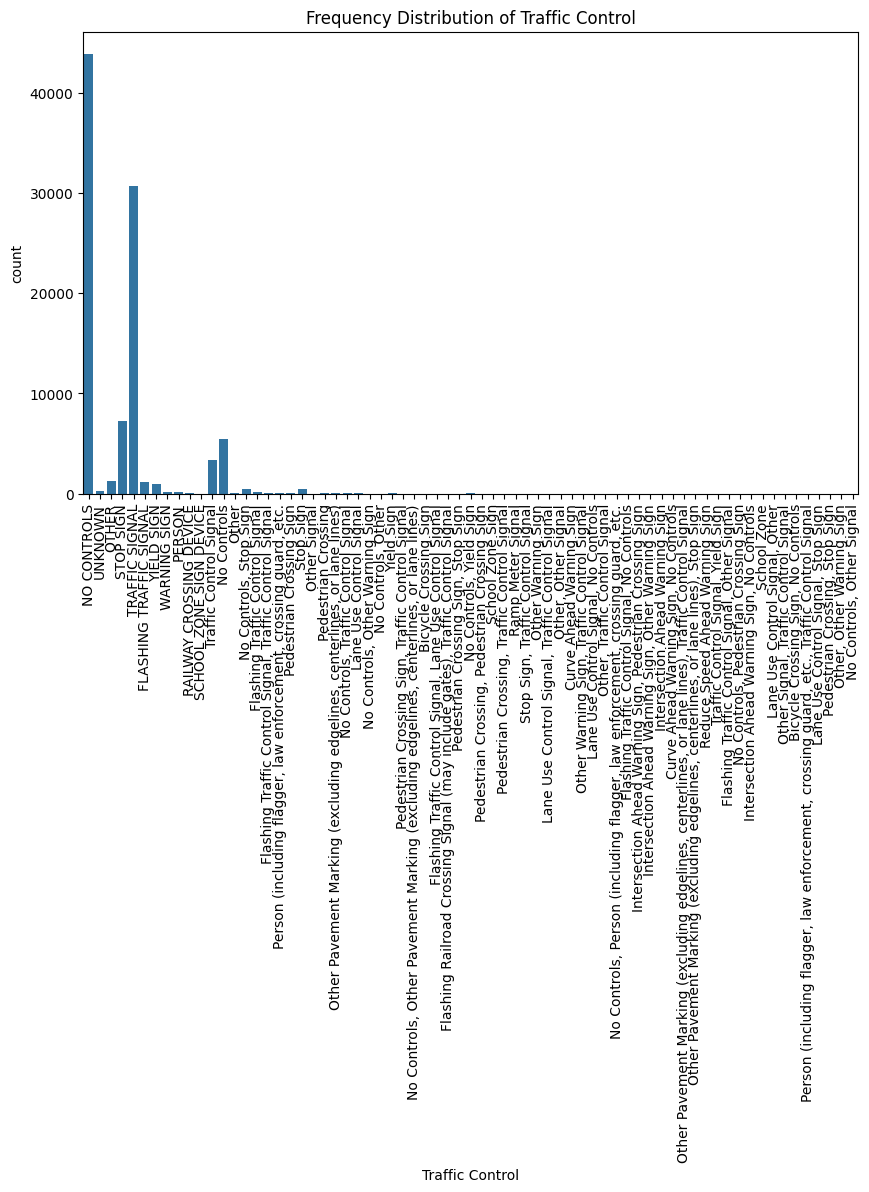

In [13]:
categorical_columns = ['Hit/Run', 'Road Grade', 'Weather', 'Light', 'Traffic Control']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Frequency Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

## Hit and Run Frequency: 
The majority of reported accidents are not hit-and-run cases, with a significantly lower count of hit-and-run incidents.

## Road Grade Distribution: 
Most accidents occur on level roads, with fewer incidents on downhill or uphill grades.

## Weather Conditions: 
Clear weather conditions dominate crash occurrences, while accidents in rainy or snowy conditions are much lower.

## Lighting Conditions: 
Most accidents happen during daylight, followed by incidents occurring in dark conditions with streetlights on.

## Traffic Control: 
A large portion of crashes happen where no traffic controls are present, followed closely by areas with traffic signals, while stop signs and other control measures see fewer incident

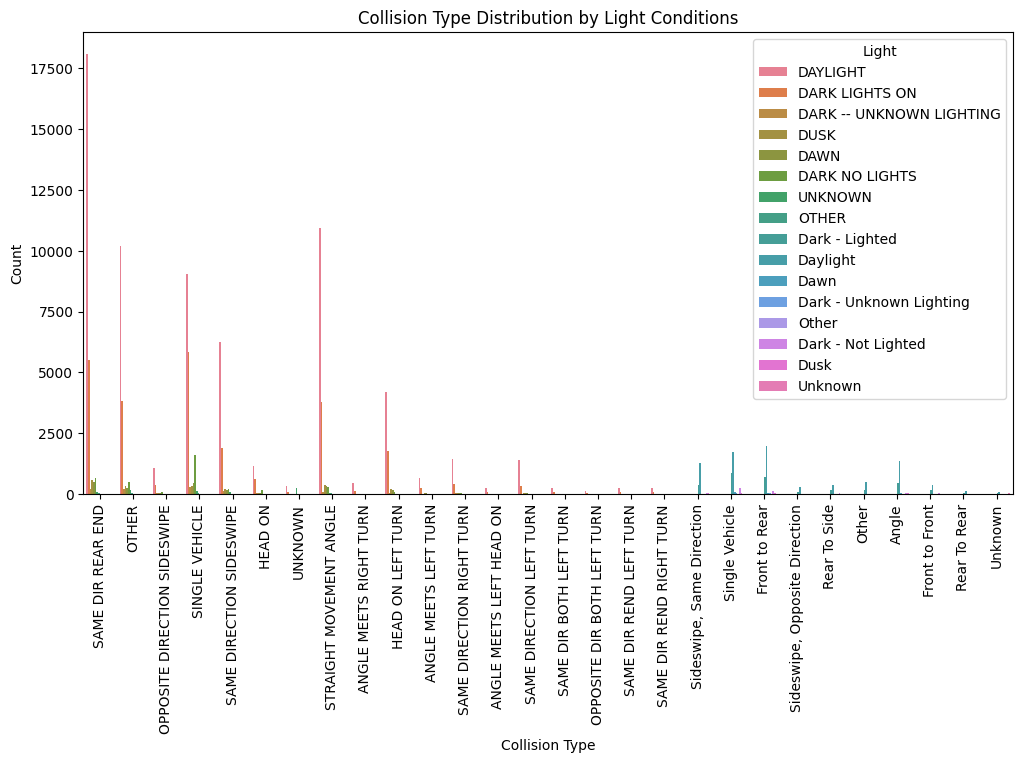

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Collision Type', hue='Light')
plt.title('Collision Type Distribution by Light Conditions')
plt.xlabel('Collision Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [16]:
# Grouping data by Collision Type and Light, and then counting the occurrences
collision_light_counts = df.groupby(['Collision Type', 'Light']).size().reset_index(name='Count')

# Print the counts
print(collision_light_counts)

               Collision Type                     Light  Count
0    ANGLE MEETS LEFT HEAD ON  DARK -- UNKNOWN LIGHTING      1
1    ANGLE MEETS LEFT HEAD ON            DARK LIGHTS ON     65
2    ANGLE MEETS LEFT HEAD ON            DARK NO LIGHTS     15
3    ANGLE MEETS LEFT HEAD ON                      DAWN      6
4    ANGLE MEETS LEFT HEAD ON                  DAYLIGHT    253
..                        ...                       ...    ...
208                   Unknown                      Dawn      1
209                   Unknown                  Daylight     90
210                   Unknown                      Dusk      2
211                   Unknown                     Other      3
212                   Unknown                   Unknown     21

[213 rows x 3 columns]


In [17]:
# Grouping data by Collision Type and Light, and then counting the occurrences
collision_light_counts = df.groupby(['Collision Type', 'Weather']).size().reset_index(name='Count')

# Print the counts
print(collision_light_counts)

               Collision Type       Weather  Count
0    ANGLE MEETS LEFT HEAD ON  BLOWING SNOW      1
1    ANGLE MEETS LEFT HEAD ON         CLEAR    224
2    ANGLE MEETS LEFT HEAD ON        CLOUDY     43
3    ANGLE MEETS LEFT HEAD ON         OTHER      1
4    ANGLE MEETS LEFT HEAD ON       RAINING     46
..                        ...           ...    ...
250                   Unknown         Clear    119
251                   Unknown        Cloudy     11
252                   Unknown          Rain     16
253                   Unknown          Snow      6
254                   Unknown       Unknown     21

[255 rows x 3 columns]


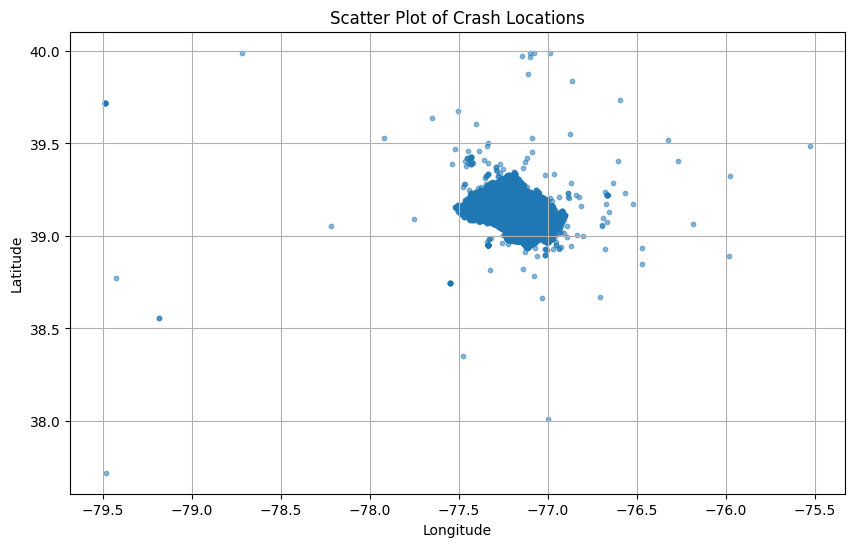

In [18]:
# Scatter plot of Longitude vs Latitude
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, s=10)  # Adjust alpha and size for better visibility
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Crash Locations")
plt.grid(True)

# Show the plot
plt.show()